## Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def detect_outliers(data, method='zscore'):
    if method == 'zscore':
        z_scores = (data - data.mean()) / data.std()
        outliers = np.where(np.abs(z_scores) > 3)[0]
    elif method == 'boxplot':
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        iqr = q3 - q1
        outliers = np.where((data < q1 - 1.5 * iqr) | (data > q3 + 1.5 * iqr))[0]
    return outliers

In [3]:
# Leer el archivo CSV
data2 = pd.read_csv('housing.csv', usecols=['total_rooms', 'total_bedrooms', 'median_income'])

In [4]:
# Obtener datos de 'total_rooms'
x = data2['total_rooms'].values

In [5]:
# Ejemplo de uso para Z score
outliers_zscore = detect_outliers(x, method='zscore')

In [6]:
# Ejemplo de uso para Boxplot
outliers_boxplot = detect_outliers(x, method='boxplot')

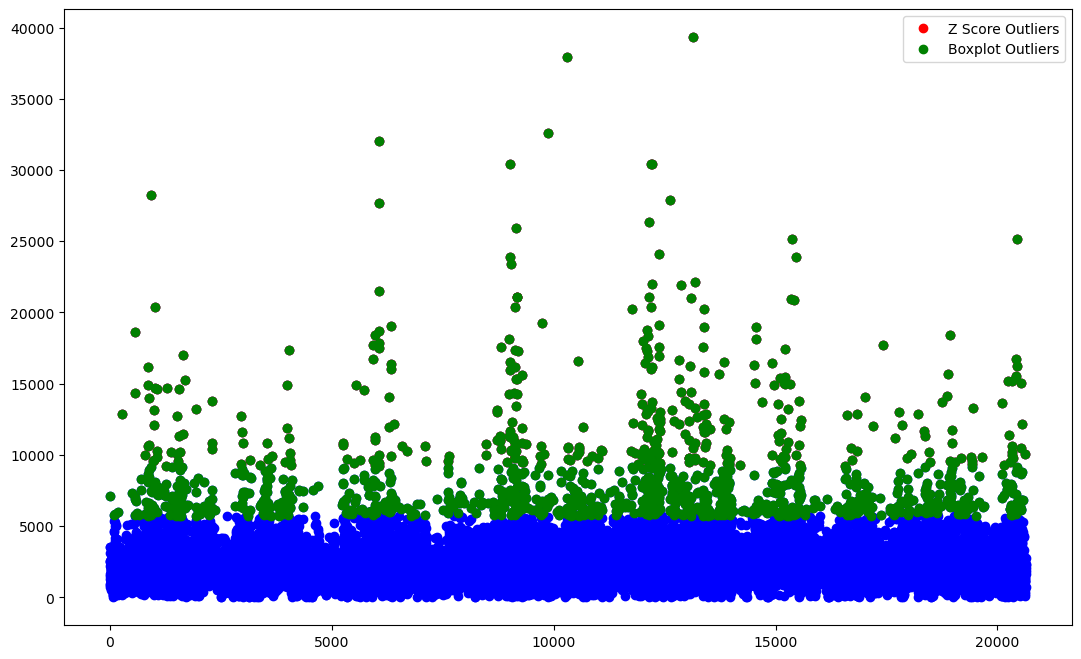

In [19]:
# Visualizar outliers
fig, ax = plt.subplots(figsize=(13, 8))
ax.plot(x, linestyle='', color='b', marker='o')
ax.plot(outliers_zscore, x[outliers_zscore], linestyle='', color='r', marker='o', label='Z Score Outliers')
ax.plot(outliers_boxplot, x[outliers_boxplot], linestyle='', color='g', marker='o', label='Boxplot Outliers')
ax.legend()